In [1]:
# script to calculate ratios for use in TTS method 
# author: sofia chelpon
# date created: 2-12-2020

In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [2]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("./awas_data_df_twp.pkl")
toga_df = pd.read_pickle("./toga_data_df_twp.pkl")

In [3]:
################# -------------------- TOGA  -------------------- #################

In [4]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
toga_means = pd.DataFrame()

# all rf 
toga_means['UT - All RF'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)].mean()
toga_means['BL - All RF'] = toga_df.loc[(toga_df['GGALT'] < 2000)].mean()
# rf03
toga_means['UT - RF03'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF03')].mean()
toga_means['BL - RF03'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF03')].mean()
# rf04 
toga_means['UT - RF04'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF04')].mean()
toga_means['BL - RF04'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF04')].mean()
# rf05
toga_means['UT - RF05'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF05')].mean()
toga_means['BL - RF05'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF05')].mean()
# rf06
toga_means['UT - RF06'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF06')].mean()
toga_means['BL - RF06'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF06')].mean()
# rf07 
toga_means['UT - RF07'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF07')].mean()
toga_means['BL - RF07'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF07')].mean()
# rf08
toga_means['UT - RF08'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF08')].mean()
toga_means['BL - RF08'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF08')].mean()
# rf09
toga_means['UT - RF09'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF09')].mean()
toga_means['BL - RF09'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF09')].mean()
# rf10
toga_means['UT - RF10'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF10')].mean()
toga_means['BL - RF10'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF10')].mean()
# rf11
toga_means['UT - RF11'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF11')].mean()
toga_means['BL - RF11'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF11')].mean()
# rf12
toga_means['UT - RF12'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF12')].mean()
toga_means['BL - RF12'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF12')].mean()
# rf13
toga_means['UT - RF13'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF13')].mean()
toga_means['BL - RF13'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF13')].mean()
# rf14
toga_means['UT - RF14'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF14')].mean()
toga_means['BL - RF14'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF14')].mean()

toga_means = toga_means.drop('GGALT').drop('GGLAT').drop('GGLON')
#toga_means.index.name = "Trace_Gas"
toga_means = toga_means.reset_index()
toga_means = toga_means.rename(columns={'index': 'Trace_Gas'})


# save output
toga_means.to_pickle("./toga_means_twp.pkl")


In [5]:
# ratios for 1) flights in total and 2) individual flights 
toga_ratios = pd.DataFrame()

toga_ratios['Trace_Gas'] = toga_means['Trace_Gas']
toga_ratios['All RF'] = toga_means['UT - All RF']/toga_means['BL - All RF']
toga_ratios['RF03'] = toga_means['UT - RF03']/toga_means['BL - RF03']
toga_ratios['RF04'] = toga_means['UT - RF04']/toga_means['BL - RF04']
toga_ratios['RF05'] = toga_means['UT - RF05']/toga_means['BL - RF05']
toga_ratios['RF06'] = toga_means['UT - RF06']/toga_means['BL - RF06']
toga_ratios['RF07'] = toga_means['UT - RF07']/toga_means['BL - RF07']
toga_ratios['RF08'] = toga_means['UT - RF08']/toga_means['BL - RF08']
toga_ratios['RF09'] = toga_means['UT - RF09']/toga_means['BL - RF09']
toga_ratios['RF10'] = toga_means['UT - RF10']/toga_means['BL - RF10']
toga_ratios['RF11'] = toga_means['UT - RF11']/toga_means['BL - RF11']
toga_ratios['RF12'] = toga_means['UT - RF12']/toga_means['BL - RF12']
toga_ratios['RF13'] = toga_means['UT - RF13']/toga_means['BL - RF13']
toga_ratios['RF14'] = toga_means['UT - RF14']/toga_means['BL - RF14']
toga_ratios

# drop species names so doesnt duplicate column when merged 
toga_ratios = toga_ratios.drop('Trace_Gas', axis = 1)

In [6]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_lifetimes_12162019.xlsx'
toga_lifetimes = pd.read_excel(mypath2)

# merge lifetimes to ratios
toga_ratios_full = toga_lifetimes.merge(toga_ratios, left_index=True, right_index=True)
toga_ratios_full.insert(0, 'Instrument', 'TOGA')
toga_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14
0,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.244027,-0.461186,-0.100916,0.400589,-0.034546,-0.241412,-0.113882,0.682698,-0.413435,1.010124,1.257823,-0.092266,NaN
1,TOGA,n_Butane,1.959376,3.813463,8.057685,0.097950,0.033484,0.010871,0.022255,0.027101,0.151014,0.212152,0.211208,0.021128,0.254290,0.084959,0.039534,NaN
2,TOGA,i_Butane,2.175570,4.031311,7.903592,0.186318,0.348539,0.150260,0.170621,0.104103,0.487147,0.163599,0.455572,1.271104,0.444384,0.020654,0.302145,NaN
3,TOGA,Benzene,3.755136,6.447323,11.947207,0.236806,0.437697,0.193054,0.187935,0.127381,0.563481,0.229809,0.522306,1.227731,0.605284,0.027276,0.339155,NaN
4,TOGA,C3H8,4.214557,9.062693,22.450000,0.358375,0.478272,0.196616,0.281641,0.162429,0.629700,0.373829,0.924865,0.898816,0.776687,0.084024,0.348502,NaN
5,TOGA,Methanol,5.160001,9.567463,20.040000,0.415569,0.709917,0.287557,0.319018,0.235523,0.654727,0.424317,0.895255,1.251672,1.295028,0.128191,0.507453,NaN
6,TOGA,Bromoform,15.069605,23.166062,33.432173,0.358415,0.225437,0.219711,0.242730,0.177393,0.350427,0.422359,0.452388,0.292676,0.535780,0.321101,0.380834,NaN
7,TOGA,Tetrachloroethylene,27.471720,77.860538,317.837040,0.627191,0.442781,0.346573,0.434512,0.284644,0.687468,0.856548,1.233019,0.893955,1.046715,0.685594,0.986804,NaN
8,TOGA,Dibromomethane,39.129546,95.533111,306.353687,0.609555,0.553364,0.414543,0.625182,0.323689,0.729214,0.677162,0.885577,0.719536,1.085581,0.443307,0.651159,NaN
9,TOGA,Dichloromethane,45.867749,109.800998,343.676023,0.956406,0.982761,0.861250,0.932793,0.842872,0.989712,0.974084,1.105400,1.020171,1.024895,0.988690,1.122159,NaN


In [7]:
################# -------------------- AWAS  -------------------- #################

In [8]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
awas_means = pd.DataFrame()

# all rf 
awas_means['UT - All RF'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)].mean()
awas_means['BL - All RF'] = awas_df.loc[(awas_df['GGALT'] < 2000)].mean()
# rf03
awas_means['UT - RF03'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF03')].mean()
awas_means['BL - RF03'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF03')].mean()
# rf04 
awas_means['UT - RF04'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF04')].mean()
awas_means['BL - RF04'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF04')].mean()
# rf05
awas_means['UT - RF05'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF05')].mean()
awas_means['BL - RF05'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF05')].mean()
# rf06
awas_means['UT - RF06'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF06')].mean()
awas_means['BL - RF06'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF06')].mean()
# rf07 
awas_means['UT - RF07'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF07')].mean()
awas_means['BL - RF07'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF07')].mean()
# rf08
awas_means['UT - RF08'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF08')].mean()
awas_means['BL - RF08'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF08')].mean()
# rf09
awas_means['UT - RF09'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF09')].mean()
awas_means['BL - RF09'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF09')].mean()
# rf10
awas_means['UT - RF10'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF10')].mean()
awas_means['BL - RF10'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF10')].mean()
# rf11
awas_means['UT - RF11'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF11')].mean()
awas_means['BL - RF11'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF11')].mean()
# rf12
awas_means['UT - RF12'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF12')].mean()
awas_means['BL - RF12'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF12')].mean()
# rf13
awas_means['UT - RF13'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF13')].mean()
awas_means['BL - RF13'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF13')].mean()
# rf14
awas_means['UT - RF14'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF14')].mean()
awas_means['BL - RF14'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF14')].mean()

#toga_means = toga_means.transpose()
awas_means.index.name = "Trace_Gas"
awas_means = awas_means.drop('GGALT').drop('GGLAT').drop('GGLON')

# save output 
awas_means.to_pickle("./awas_means_twp.pkl")
awas_means

,UT - All RF,BL - All RF,UT - RF03,BL - RF03,UT - RF04,BL - RF04,UT - RF05,BL - RF05,UT - RF06,BL - RF06,...,UT - RF10,BL - RF10,UT - RF11,BL - RF11,UT - RF12,BL - RF12,UT - RF13,BL - RF13,UT - RF14,BL - RF14
Trace_Gas,,,,,,,,,,,,,,,,,,,,,
C2H6_Ethane,491.333344,824.392883,NaN,NaN,NaN,NaN,446.500000,841.636353,621.636353,1659.250000,...,461.076935,534.636353,504.916656,582.142883,435.037048,NaN,521.349976,NaN,473.777771,NaN
C2H2_Ethyne,56.574074,121.611115,NaN,NaN,NaN,NaN,45.312500,139.363632,92.545456,325.500000,...,66.307693,54.545456,71.416664,82.571426,37.444443,NaN,52.700001,NaN,47.222221,NaN
C3H8_Propane,40.679012,146.821426,NaN,NaN,NaN,NaN,34.750000,191.090912,84.727272,562.500000,...,42.461540,36.454544,34.583332,39.000000,20.444445,NaN,45.599998,NaN,26.888889,NaN
C4H10_Isobutane,3.007406,15.487496,NaN,NaN,NaN,NaN,2.812500,22.490910,9.536363,78.224998,...,3.507693,2.418182,2.066667,2.214286,1.029630,NaN,2.697500,NaN,1.300000,NaN
C4H10_nButane,5.058023,24.807148,NaN,NaN,NaN,NaN,5.243750,35.263638,18.809093,135.675003,...,4.684615,3.563637,3.466667,3.071429,1.929630,NaN,4.330000,NaN,1.988889,NaN
C5H12_nPentane,0.817821,4.258332,NaN,NaN,NaN,NaN,1.100000,6.211111,2.309091,25.275000,...,0.737500,0.642857,0.310000,0.240000,0.400000,NaN,0.273684,NaN,0.150000,NaN
C6H6_Benzene,9.812962,27.079630,NaN,NaN,NaN,NaN,6.600000,32.027271,16.545454,78.900002,...,12.184616,13.527273,14.908333,18.142857,6.162963,NaN,8.730000,NaN,7.100000,NaN
OCS_Carbonyl_sulfide,549.552795,546.036377,NaN,NaN,NaN,NaN,557.687500,562.727295,560.727295,559.750000,...,552.769226,539.272705,548.083313,548.333313,551.846130,NaN,537.150024,NaN,542.111084,NaN
C2H6S_Dimethyl_sulfide,0.343878,16.865452,NaN,NaN,NaN,NaN,0.575000,19.000002,0.177778,9.825001,...,1.300000,10.527273,0.100000,8.057142,0.171429,NaN,0.160870,NaN,0.128571,NaN


In [9]:
# ratios for 1) flights in total and 2) individual flights 
awas_ratios = pd.DataFrame()

awas_ratios['All RF'] = awas_means['UT - All RF']/awas_means['BL - All RF']
awas_ratios['RF03'] = awas_means['UT - RF03']/awas_means['BL - RF03']
awas_ratios['RF04'] = awas_means['UT - RF04']/awas_means['BL - RF04']
awas_ratios['RF05'] = awas_means['UT - RF05']/awas_means['BL - RF05']
awas_ratios['RF06'] = awas_means['UT - RF06']/awas_means['BL - RF06']
awas_ratios['RF07'] = awas_means['UT - RF07']/awas_means['BL - RF07']
awas_ratios['RF08'] = awas_means['UT - RF08']/awas_means['BL - RF08']
awas_ratios['RF09'] = awas_means['UT - RF09']/awas_means['BL - RF09']
awas_ratios['RF10'] = awas_means['UT - RF10']/awas_means['BL - RF10']
awas_ratios['RF11'] = awas_means['UT - RF11']/awas_means['BL - RF11']
awas_ratios['RF12'] = awas_means['UT - RF12']/awas_means['BL - RF12']
awas_ratios['RF13'] = awas_means['UT - RF13']/awas_means['BL - RF13']
awas_ratios['RF14'] = awas_means['UT - RF14']/awas_means['BL - RF14']

awas_ratios = awas_ratios.reset_index()

# trop trace gas names column so doesnt get duplicated 
awas_ratios = awas_ratios.drop('Trace_Gas', axis = 1)

In [10]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)
len(awas_lifetimes)

# merge lifetimes to ratios 
awas_ratios_full = awas_lifetimes.merge(awas_ratios, left_index=True, right_index=True)
awas_ratios_full.insert(0, 'Instrument', 'AWAS')
awas_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.595994,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.465205,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.277065,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.194183,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.203894,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192052,NaN,NaN,0.177102,0.091359,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.362374,NaN,NaN,0.206074,0.209702,0.580932,0.303141,NaN,0.900744,0.821719,NaN,NaN,NaN
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,1.006440,NaN,NaN,0.991044,1.001746,1.027613,1.044827,NaN,1.025027,0.999544,NaN,NaN,NaN
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.020389,NaN,NaN,0.030263,0.018094,0.019185,0.004987,NaN,0.123489,0.012411,NaN,NaN,NaN
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.003045,NaN,NaN,1.002594,1.002320,1.002741,1.009211,NaN,1.003206,0.998242,NaN,NaN,NaN


In [11]:
################# -------------------- MERGE THE TWO  -------------------- #################

In [12]:
master_list = awas_ratios_full
master_list = master_list.append(toga_ratios_full, ignore_index = True, sort = None)

# pickle this!! 
master_list.to_pickle("./contrast_ratios_twp.pkl")

# look at output 
master_list

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.595994,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.465205,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.277065,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.194183,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.203894,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192052,NaN,NaN,0.177102,0.091359,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.362374,NaN,NaN,0.206074,0.209702,0.580932,0.303141,NaN,0.900744,0.821719,NaN,NaN,NaN
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,1.006440,NaN,NaN,0.991044,1.001746,1.027613,1.044827,NaN,1.025027,0.999544,NaN,NaN,NaN
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.020389,NaN,NaN,0.030263,0.018094,0.019185,0.004987,NaN,0.123489,0.012411,NaN,NaN,NaN
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.003045,NaN,NaN,1.002594,1.002320,1.002741,1.009211,NaN,1.003206,0.998242,NaN,NaN,NaN


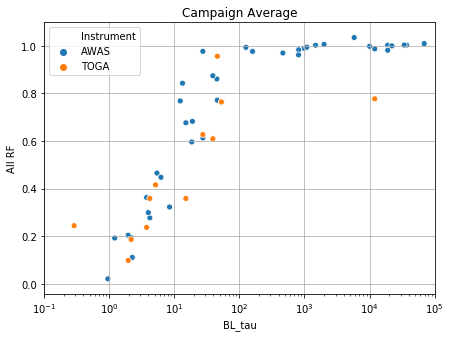

In [13]:
# test plot 
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log")
sns.scatterplot(data=master_list, x='BL_tau', y='All RF', hue='Instrument', ax = ax)
ax.set_xlim([10**-1, 10**5])
ax.set_title('Campaign Average')
ax.grid(which = 'major')